In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('quantitative-question-ratings.csv')
del df['age'], df['index'], df['user_id']  # Don't need these columns
df.head()

,q1,q2,q3,q4,q5,q6,q7,q8
0,8.0,8.0,8.0,8.0,2.0,7.0,1.0,1.0
1,8.0,8.0,3.0,4.0,2.0,5.0,6.0,3.0
2,0.0,9.0,9.0,9.0,8.0,5.0,9.0,9.0
3,0.0,9.0,9.0,0.0,7.0,9.0,9.0,0.0
4,8.0,9.0,9.0,8.0,7.0,9.0,9.0,9.0


In [3]:
ratings = df.as_matrix()
mean_row = np.nanmean(ratings, axis=0)
# Center mean row at origin, convert missing data to zero (the mean)
normalized_ratings = np.nan_to_num(ratings - mean_row)

<Container object of 3 artists>

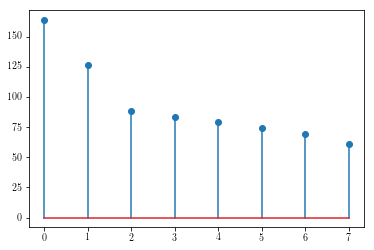

In [4]:
U, S, VT = np.linalg.svd(normalized_ratings)
plt.stem(S)

In [5]:
n = 2  # Take the first two most significant principal components (see singular values above)
first_component, second_component = VT[:n]
print('First principal component is:', np.round(first_component, 3))
print('Second principal component is:', np.round(second_component, 3))

First principal component is: [-0.347 -0.369 -0.427 -0.431 -0.244 -0.366 -0.372 -0.21 ]
Second principal component is: [-0.061 -0.107 -0.131 -0.133  0.107 -0.066 -0.082  0.963]
